In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [53]:
df = pd.read_csv('CSE.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-07-01,798.500000,798.500000,798.500000,798.500000,798.500000,0.0
1,1997-07-02,805.299988,805.299988,805.299988,805.299988,805.299988,0.0
2,1997-07-03,810.799988,810.799988,810.799988,810.799988,810.799988,0.0
3,1997-07-07,828.200012,828.200012,828.200012,828.200012,828.200012,0.0
4,1997-07-08,821.400024,821.400024,821.400024,821.400024,821.400024,0.0


In [54]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [55]:
df.shape

(5949, 7)

In [56]:
df = df.dropna()

In [57]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [58]:
df.shape

(5510, 7)

In [59]:
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
df = df.set_index('Date')

Text(0, 0.5, 'Close Price')

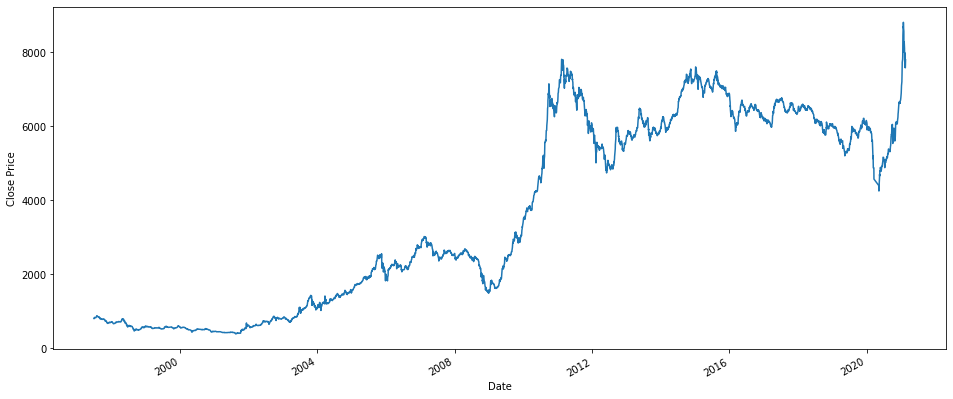

In [61]:
plt.figure(figsize=(16,7))
df['Close'].plot()
plt.xlabel('Date')
plt.ylabel('Close Price')

In [62]:
data = df.filter(['Close'])
dataset = data.values

In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [94]:
train_len = round(len(dataset)*0.8)
train_df = scaled_data[:train_len]
test_df = scaled_data[train_len:]

In [91]:
test_df

array([[0.73386236],
       [0.73498826],
       [0.73666237],
       ...,
       [0.85481879],
       [0.87238049],
       [0.87968661]])

In [65]:
train_df

array([[0.04924442],
       [0.05005119],
       [0.05070374],
       ...,
       [0.7188752 ],
       [0.72762283],
       [0.73555304]])

In [66]:
len(train_df),len(test_df),len(df)

(4408, 1102, 5510)

In [67]:
X_train = []
y_train = []
for i in range(60, len(train_df)):
    X_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [72]:
X_train.shape, y_train.shape

((4348, 60), (4348,))

In [73]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [99]:
model = Sequential()
model.add(LSTM(units = 50, input_shape = (X_train.shape[1],1,), return_sequences = True ))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False ))
model.add(Dense(25))
model.add(Dense(1))

In [100]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [101]:
model.fit(X_train,y_train, batch_size = 1, epochs=1)

4348/4348 [==============================] - 166s 37ms/step - loss: 9.7496e-04


In [117]:
X_test = []
y_test = dataset[train_len+60:,:]
for i in range(60, len(test_df)): 
    X_test.append(test_df[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [118]:
len(predicted_stock_price)

1042

In [119]:
len(y_test)

1042

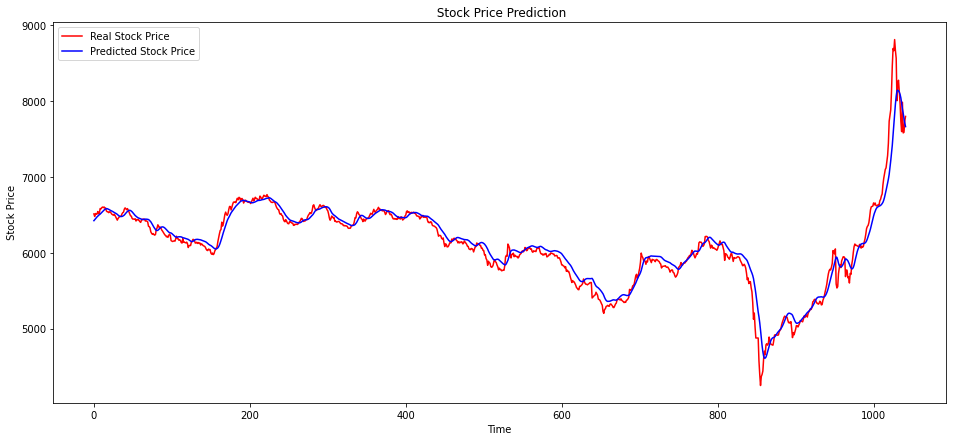

In [121]:
plt.figure(figsize=(16,7))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()